## Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Processing

In [4]:
#Loading U.S.A GDP 
us_gdp = pd.read_csv("GDP.csv")
us_gdp

,DATE,GDP
0,2000-01-01,10002.179
1,2000-04-01,10247.720
2,2000-07-01,10318.165
3,2000-10-01,10435.744
4,2001-01-01,10470.231
...,...,...
93,2023-04-01,27063.012
94,2023-07-01,27610.128
95,2023-10-01,27956.998
96,2024-01-01,28269.174


In [5]:
#dataset size and info
us_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    98 non-null     object 
 1   GDP     98 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
#statistical information
us_gdp.describe()

,GDP
count,98.000000
mean,17083.290398
std,4919.458278
min,10002.179000
25%,13637.726000
50%,16137.960000
75%,20255.686750
max,28629.153000


In [7]:
gdp_df = us_gdp.copy()
# Convert 'Date' column to datetime format
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])

# Set 'Date' as the index
gdp_df.set_index('DATE', inplace=True)

# Create a date range that includes every month
full_date_range = pd.date_range(start=gdp_df.index.min(), end=gdp_df.index.max(), freq='MS')

# Reindex the dataframe to the new date range and fill missing GDP values with NaN
gdp_df = gdp_df.reindex(full_date_range, fill_value=np.nan)

# Reset index to get 'Date' as a column again
gdp_df.reset_index(inplace=True)
gdp_df.rename(columns={'index': 'DATE'}, inplace=True)
gdp_df

,DATE,GDP
0,2000-01-01,10002.179
1,2000-02-01,NaN
2,2000-03-01,NaN
3,2000-04-01,10247.720
4,2000-05-01,NaN
...,...,...
287,2023-12-01,NaN
288,2024-01-01,28269.174
289,2024-02-01,NaN
290,2024-03-01,NaN


GDP results are published quaterly. So, it needs to be converted to monthly basis by importing the quaterly value for each month.

In [9]:
#forward filling GDP values
gdp_df['GDP'] = gdp_df['GDP'].ffill()
gdp_df

,DATE,GDP
0,2000-01-01,10002.179
1,2000-02-01,10002.179
2,2000-03-01,10002.179
3,2000-04-01,10247.720
4,2000-05-01,10247.720
...,...,...
287,2023-12-01,27956.998
288,2024-01-01,28269.174
289,2024-02-01,28269.174
290,2024-03-01,28269.174


In [10]:
#Loading unemployment rate data
unemp = pd.read_csv("UNRATE.csv")
unemp

,DATE,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
290,2024-03-01,3.8
291,2024-04-01,3.9
292,2024-05-01,4.0
293,2024-06-01,4.1


In [11]:
unemp["DATE"] = pd.to_datetime(unemp["DATE"])
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    295 non-null    datetime64[ns]
 1   UNRATE  295 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [12]:
# Merge the GDP dataframe with the Unemployment Rate dataframe on 'Date'
gdp_un = pd.merge(gdp_df, unemp, on='DATE', how='outer')

# Sort by Date (if not already sorted)
gdp_un = gdp_un.sort_values(by='DATE').reset_index(drop=True)
gdp_un

,DATE,GDP,UNRATE
0,2000-01-01,10002.179,4.0
1,2000-02-01,10002.179,4.1
2,2000-03-01,10002.179,4.0
3,2000-04-01,10247.720,3.8
4,2000-05-01,10247.720,4.0
...,...,...,...
290,2024-03-01,28269.174,3.8
291,2024-04-01,28629.153,3.9
292,2024-05-01,NaN,4.0
293,2024-06-01,NaN,4.1


In [13]:
#Loading Housing Price Index data
hpi = pd.read_csv("CSUSHPISA.csv")
hpi

,DATE,CSUSHPISA
0,2000-01-01,100.551
1,2000-02-01,101.339
2,2000-03-01,102.127
3,2000-04-01,102.922
4,2000-05-01,103.677
...,...,...
288,2024-01-01,315.787
289,2024-02-01,317.332
290,2024-03-01,318.308
291,2024-04-01,319.326


In [14]:
#Converting date column to datetime
hpi["DATE"] = pd.to_datetime(hpi["DATE"])
hpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       293 non-null    datetime64[ns]
 1   CSUSHPISA  293 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [15]:
gdp_un_hpi = pd.merge(gdp_un, hpi, on='DATE', how='outer')

# Sort by Date (if not already sorted)
gdp_un_hpi = gdp_un_hpi.sort_values(by='DATE').reset_index(drop=True)
gdp_un_hpi

,DATE,GDP,UNRATE,CSUSHPISA
0,2000-01-01,10002.179,4.0,100.551
1,2000-02-01,10002.179,4.1,101.339
2,2000-03-01,10002.179,4.0,102.127
3,2000-04-01,10247.720,3.8,102.922
4,2000-05-01,10247.720,4.0,103.677
...,...,...,...,...
290,2024-03-01,28269.174,3.8,318.308
291,2024-04-01,28629.153,3.9,319.326
292,2024-05-01,NaN,4.0,320.144
293,2024-06-01,NaN,4.1,NaN


In [16]:
#Loading Consumer Price Index(CPI) data
cpi = pd.read_csv("CPALTT01USM657N.csv")
cpi

,DATE,CPALTT01USM657N
0,1/01/2000,0.297089
1,1/02/2000,0.592417
2,1/03/2000,0.824499
3,1/04/2000,0.058411
4,1/05/2000,0.116754
...,...,...
286,1/11/2023,-0.201514
287,1/12/2023,-0.099332
288,1/01/2024,0.544750
289,1/02/2024,0.618967


In [17]:
# Convert the 'Date' column to datetime format and store it in the desired format
cpi['DATE'] = pd.to_datetime(cpi['DATE'], format='%d/%m/%Y')
cpi

,DATE,CPALTT01USM657N
0,2000-01-01,0.297089
1,2000-02-01,0.592417
2,2000-03-01,0.824499
3,2000-04-01,0.058411
4,2000-05-01,0.116754
...,...,...
286,2023-11-01,-0.201514
287,2023-12-01,-0.099332
288,2024-01-01,0.544750
289,2024-02-01,0.618967


In [18]:
gdp_un_hpi_cpi = pd.merge(gdp_un_hpi, cpi, on='DATE', how='outer')

# Sort by Date (if not already sorted)
gdp_un_hpi_cpi = gdp_un_hpi_cpi.sort_values(by='DATE').reset_index(drop=True)
gdp_un_hpi_cpi

,DATE,GDP,UNRATE,CSUSHPISA,CPALTT01USM657N
0,2000-01-01,10002.179,4.0,100.551,0.297089
1,2000-02-01,10002.179,4.1,101.339,0.592417
2,2000-03-01,10002.179,4.0,102.127,0.824499
3,2000-04-01,10247.720,3.8,102.922,0.058411
4,2000-05-01,10247.720,4.0,103.677,0.116754
...,...,...,...,...,...
290,2024-03-01,28269.174,3.8,318.308,0.646417
291,2024-04-01,28629.153,3.9,319.326,NaN
292,2024-05-01,NaN,4.0,320.144,NaN
293,2024-06-01,NaN,4.1,NaN,NaN


In [19]:
#Loading Industrial Production measure dataset
ind = pd.read_csv("INDPRO.csv")
ind

,DATE,INDPRO
0,2000-01-01,91.4092
1,2000-02-01,91.7245
2,2000-03-01,92.0830
3,2000-04-01,92.6659
4,2000-05-01,92.9347
...,...,...
289,2024-02-01,102.6045
290,2024-03-01,102.4062
291,2024-04-01,102.4329
292,2024-05-01,103.3282


In [20]:
ind["DATE"] = pd.to_datetime(ind["DATE"])
ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    294 non-null    datetime64[ns]
 1   INDPRO  294 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [21]:
eco_ind_us = pd.merge(gdp_un_hpi_cpi, ind, on='DATE', how='outer')

# Sort by Date (if not already sorted)
eco_ind_us = eco_ind_us.sort_values(by='DATE').reset_index(drop=True)
eco_ind_us

,DATE,GDP,UNRATE,CSUSHPISA,CPALTT01USM657N,INDPRO
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347
...,...,...,...,...,...,...
290,2024-03-01,28269.174,3.8,318.308,0.646417,102.4062
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941


In [22]:
#Loading Australian Security Exchange(ASX) dataset
asx = pd.read_csv("S&P_ASX 200 Historical Data.csv")
asx

,Date,Price,Open,High,Low,Vol.,Change %
0,01/08/2024,"7,813.70","8,092.30","8,148.70","7,628.10",5.47B,-3.44%
1,01/07/2024,"8,092.30","7,767.50","8,092.30","7,702.50",12.79B,4.18%
2,01/06/2024,"7,767.50","7,701.70","7,861.80","7,654.20",12.75B,0.85%
3,01/05/2024,"7,701.70","7,664.10","7,900.20","7,556.50",13.66B,0.49%
4,01/04/2024,"7,664.10","7,896.90","7,910.50","7,492.60",11.63B,-2.95%
...,...,...,...,...,...,...,...
291,01/05/2000,"3,081.00","3,115.80","3,131.90","2,985.70",NaN,-1.12%
292,01/04/2000,"3,115.80","3,133.30","3,201.40","2,902.10",NaN,-0.56%
293,01/03/2000,"3,133.30","3,133.30","3,133.30","3,133.30",NaN,0.28%
294,01/02/2000,"3,124.60","3,124.60","3,124.60","3,124.60",NaN,1.44%


In [23]:
# Convert the 'Date' column to datetime format and store it in the yyyy-mm-dd format
asx['Date'] = pd.to_datetime(asx['Date'], format='%d/%m/%Y')
asx

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-08-01,"7,813.70","8,092.30","8,148.70","7,628.10",5.47B,-3.44%
1,2024-07-01,"8,092.30","7,767.50","8,092.30","7,702.50",12.79B,4.18%
2,2024-06-01,"7,767.50","7,701.70","7,861.80","7,654.20",12.75B,0.85%
3,2024-05-01,"7,701.70","7,664.10","7,900.20","7,556.50",13.66B,0.49%
4,2024-04-01,"7,664.10","7,896.90","7,910.50","7,492.60",11.63B,-2.95%
...,...,...,...,...,...,...,...
291,2000-05-01,"3,081.00","3,115.80","3,131.90","2,985.70",NaN,-1.12%
292,2000-04-01,"3,115.80","3,133.30","3,201.40","2,902.10",NaN,-0.56%
293,2000-03-01,"3,133.30","3,133.30","3,133.30","3,133.30",NaN,0.28%
294,2000-02-01,"3,124.60","3,124.60","3,124.60","3,124.60",NaN,1.44%


In [24]:
def convert_volume(value):
  if isinstance(value, str):
    if value[-1] == 'B':
      return float(value[:-1]) * 1000000000
    elif value[-1] == 'M':
      return float(value[:-1]) * 1000000
    else:
      return float(value)
  else:
    return value


asx['Vol.'] = asx['Vol.'].apply(convert_volume)
asx

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-08-01,"7,813.70","8,092.30","8,148.70","7,628.10",5.470000e+09,-3.44%
1,2024-07-01,"8,092.30","7,767.50","8,092.30","7,702.50",1.279000e+10,4.18%
2,2024-06-01,"7,767.50","7,701.70","7,861.80","7,654.20",1.275000e+10,0.85%
3,2024-05-01,"7,701.70","7,664.10","7,900.20","7,556.50",1.366000e+10,0.49%
4,2024-04-01,"7,664.10","7,896.90","7,910.50","7,492.60",1.163000e+10,-2.95%
...,...,...,...,...,...,...,...
291,2000-05-01,"3,081.00","3,115.80","3,131.90","2,985.70",NaN,-1.12%
292,2000-04-01,"3,115.80","3,133.30","3,201.40","2,902.10",NaN,-0.56%
293,2000-03-01,"3,133.30","3,133.30","3,133.30","3,133.30",NaN,0.28%
294,2000-02-01,"3,124.60","3,124.60","3,124.60","3,124.60",NaN,1.44%


In [25]:
asx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      296 non-null    datetime64[ns]
 1   Price     296 non-null    object        
 2   Open      296 non-null    object        
 3   High      296 non-null    object        
 4   Low       296 non-null    object        
 5   Vol.      254 non-null    float64       
 6   Change %  296 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 16.3+ KB


In [26]:
# Remove commas and convert columns to float
columns_to_convert = ['Price', 'Open', 'High', 'Low']

for col in columns_to_convert:
    # Remove commas
    asx[col] = asx[col].str.replace(',', '', regex=True)
    # Convert to float
    asx[col] = asx[col].astype(float)
asx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      296 non-null    datetime64[ns]
 1   Price     296 non-null    float64       
 2   Open      296 non-null    float64       
 3   High      296 non-null    float64       
 4   Low       296 non-null    float64       
 5   Vol.      254 non-null    float64       
 6   Change %  296 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 16.3+ KB


In [27]:
asx.rename(columns = {"Date": "DATE"}, inplace=True)
asx

,DATE,Price,Open,High,Low,Vol.,Change %
0,2024-08-01,7813.7,8092.3,8148.7,7628.1,5.470000e+09,-3.44%
1,2024-07-01,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%
2,2024-06-01,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%
3,2024-05-01,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%
4,2024-04-01,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%
...,...,...,...,...,...,...,...
291,2000-05-01,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%
292,2000-04-01,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%
293,2000-03-01,3133.3,3133.3,3133.3,3133.3,NaN,0.28%
294,2000-02-01,3124.6,3124.6,3124.6,3124.6,NaN,1.44%


In [28]:
eco_ind_us_asx = pd.merge(eco_ind_us, asx, on='DATE', how='outer')

# Sort by Date (if not already sorted)
eco_ind_us_asx = eco_ind_us_asx.sort_values(by='DATE').reset_index(drop=True)
eco_ind_us_asx

,DATE,GDP,UNRATE,CSUSHPISA,CPALTT01USM657N,INDPRO,Price,Open,High,Low,Vol.,Change %
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,NaN,-1.20%
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,NaN,1.44%
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,NaN,0.28%
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%
...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%


In [29]:
#Renaming column names for better readability
eco_ind_us_asx.rename(columns = {"CSUSHPISA": "US_HousingPriceIndex", "CPALTT01USM657N": "US_CPI", "GDP": "US_GDP",
                                "INDPRO": "US_INDPRO", "Vol.":"Volume", "UNRATE": "US_UNRATE"}, inplace=True)
eco_ind_us_asx

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,NaN,-1.20%
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,NaN,1.44%
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,NaN,0.28%
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%
...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%


In [30]:
eco_ind_us_asx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  296 non-null    datetime64[ns]
 1   US_GDP                292 non-null    float64       
 2   US_UNRATE             295 non-null    float64       
 3   US_HousingPriceIndex  293 non-null    float64       
 4   US_CPI                291 non-null    float64       
 5   US_INDPRO             294 non-null    float64       
 6   Price                 296 non-null    float64       
 7   Open                  296 non-null    float64       
 8   High                  296 non-null    float64       
 9   Low                   296 non-null    float64       
 10  Volume                254 non-null    float64       
 11  Change %              296 non-null    object        
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 27.9+ KB


In [31]:
#Converting Change% to float
eco_ind_us_asx['Change'] = eco_ind_us_asx['Change %'].str.rstrip('%').astype('float') / 100
eco_ind_us_asx

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %,Change
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,NaN,-1.20%,-0.0120
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,NaN,1.44%,0.0144
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,NaN,0.28%,0.0028
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%,-0.0056
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%,-0.0112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%,-0.0295
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%,0.0049
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%,0.0085
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%,0.0418


In [32]:
#Loading US Recession dataset
rec = pd.read_csv("USREC.csv")
rec

,DATE,USREC
0,2000-01-01,0
1,2000-02-01,0
2,2000-03-01,0
3,2000-04-01,0
4,2000-05-01,0
...,...,...
290,2024-03-01,0
291,2024-04-01,0
292,2024-05-01,0
293,2024-06-01,0


In [33]:
rec["DATE"] = pd.to_datetime(rec["DATE"])
rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    295 non-null    datetime64[ns]
 1   USREC   295 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.7 KB


In [34]:
stock_df = pd.merge(eco_ind_us_asx, rec, on='DATE', how='outer')

# Sort by Date (if not already sorted)
stock_df = stock_df.sort_values(by='DATE').reset_index(drop=True)
stock_df

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %,Change,USREC
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,NaN,-1.20%,-0.0120,0.0
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,NaN,1.44%,0.0144,0.0
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,NaN,0.28%,0.0028,0.0
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%,-0.0056,0.0
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%,-0.0112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%,-0.0295,0.0
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%,0.0049,0.0
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%,0.0085,0.0
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%,0.0418,0.0


### Handling Missing Values

In [36]:
stock_df.isnull().sum()

DATE                     0
US_GDP                   4
US_UNRATE                1
US_HousingPriceIndex     3
US_CPI                   5
US_INDPRO                2
Price                    0
Open                     0
High                     0
Low                      0
Volume                  42
Change %                 0
Change                   0
USREC                    1
dtype: int64

In [37]:
#Filling missing value with mean for numerical values
stock_df['Open'] = stock_df['Open'].fillna(stock_df['Open'].mean())
stock_df['High'] = stock_df['High'].fillna(stock_df['High'].mean())
stock_df['Low'] = stock_df['Low'].fillna(stock_df['Low'].mean())
stock_df['Price'] = stock_df['Price'].fillna(stock_df['Price'].mean())
stock_df['Volume'] = stock_df['Volume'].fillna(stock_df['Volume'].mean())
stock_df

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %,Change,USREC
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,1.458555e+10,-1.20%,-0.0120,0.0
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,1.458555e+10,1.44%,0.0144,0.0
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,1.458555e+10,0.28%,0.0028,0.0
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,1.458555e+10,-0.56%,-0.0056,0.0
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,1.458555e+10,-1.12%,-0.0112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%,-0.0295,0.0
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%,0.0049,0.0
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%,0.0085,0.0
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%,0.0418,0.0


In [38]:
stock_df.isnull().sum()

DATE                    0
US_GDP                  4
US_UNRATE               1
US_HousingPriceIndex    3
US_CPI                  5
US_INDPRO               2
Price                   0
Open                    0
High                    0
Low                     0
Volume                  0
Change %                0
Change                  0
USREC                   1
dtype: int64

In [39]:
#Filling missing values with forward/backward fill (suitable for time series data)
stock_df['US_UNRATE'] = stock_df['US_UNRATE'].fillna(method='ffill')
stock_df['US_GDP'] = stock_df['US_GDP'].fillna(method='ffill')  # Forward fill for the first missing value
stock_df['US_CPI'] = stock_df['US_CPI'].fillna(stock_df['US_CPI'].mean())  # Use mean for the last missing value
stock_df['US_HousingPriceIndex'] = stock_df['US_HousingPriceIndex'].fillna(stock_df['US_HousingPriceIndex'].mean())
stock_df['US_INDPRO'] = stock_df['US_INDPRO'].fillna(stock_df['US_INDPRO'].mean())

C:\Users\sowmi\AppData\Local\Temp\ipykernel_22500\3317210555.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_df['US_UNRATE'] = stock_df['US_UNRATE'].fillna(method='ffill')
C:\Users\sowmi\AppData\Local\Temp\ipykernel_22500\3317210555.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_df['US_GDP'] = stock_df['US_GDP'].fillna(method='ffill')  # Forward fill for the first missing value


In [40]:
stock_df.isnull().sum()

DATE                    0
US_GDP                  0
US_UNRATE               0
US_HousingPriceIndex    0
US_CPI                  0
US_INDPRO               0
Price                   0
Open                    0
High                    0
Low                     0
Volume                  0
Change %                0
Change                  0
USREC                   1
dtype: int64

In [41]:
stock_df

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %,Change,USREC
0,2000-01-01,10002.179,4.0,100.551000,0.297089,91.409200,3080.2,3080.2,3080.2,3080.2,1.458555e+10,-1.20%,-0.0120,0.0
1,2000-02-01,10002.179,4.1,101.339000,0.592417,91.724500,3124.6,3124.6,3124.6,3124.6,1.458555e+10,1.44%,0.0144,0.0
2,2000-03-01,10002.179,4.0,102.127000,0.824499,92.083000,3133.3,3133.3,3133.3,3133.3,1.458555e+10,0.28%,0.0028,0.0
3,2000-04-01,10247.720,3.8,102.922000,0.058411,92.665900,3115.8,3133.3,3201.4,2902.1,1.458555e+10,-0.56%,-0.0056,0.0
4,2000-05-01,10247.720,4.0,103.677000,0.116754,92.934700,3081.0,3115.8,3131.9,2985.7,1.458555e+10,-1.12%,-0.0112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326000,0.213456,102.432900,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%,-0.0295,0.0
292,2024-05-01,28629.153,4.0,320.144000,0.213456,103.328200,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%,0.0049,0.0
293,2024-06-01,28629.153,4.1,179.853201,0.213456,103.994100,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%,0.0085,0.0
294,2024-07-01,28629.153,4.3,179.853201,0.213456,97.156722,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%,0.0418,0.0


In [79]:
stock_df.dropna(inplace=True)

In [102]:
stock_df.to_csv("cleaned.csv")

### Standardization

In [83]:
#Standardization
# Features (X) and Target (y)
X = stock_df[['US_GDP', 'US_HousingPriceIndex', 'US_INDPRO', 'US_UNRATE', 'US_CPI']]
y = stock_df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train

array([[-0.49381806, -0.1712259 ,  0.94321562, -0.41158207,  0.16183267],
       [-0.84962283, -0.24503717, -0.09964761, -0.26012672,  1.11048652],
       [-1.3130884 , -1.24524666, -1.48994257, -0.61352255, -0.14002214],
       ...,
       [-0.5134303 , -0.45275822, -0.78388143,  0.54763519, -5.31407689],
       [ 1.75765381,  2.24172807,  1.20183693, -1.11837374, -0.58847153],
       [-0.45543069, -0.31703836,  0.46524594,  0.042784  ,  0.74447773]])

### Cross validation

Best K for Linear Regression: 95 with RMSE: 449.3746823006763
Best K for Random Forest: 40 with RMSE: 215.22521064847385


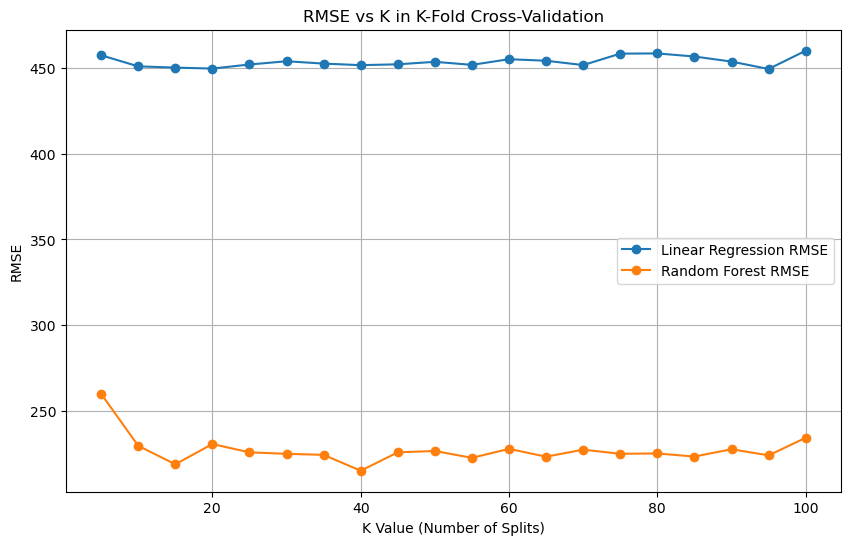

In [91]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Linear Regression and Random Forest models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=90, random_state=42)

# List to store results
k_values = list(range(5, 105, 5))
lr_rmse_scores = []
rf_rmse_scores = []

# Loop over K values
for k in k_values:
    # Create KFold object with current K value
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Cross-Validation for Linear Regression
    lr_cv_scores = cross_val_score(lr_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    lr_rmse = (-lr_cv_scores.mean())**0.5  # Convert from negative MSE to RMSE
    lr_rmse_scores.append(lr_rmse)
    
    # Cross-Validation for Random Forest
    rf_cv_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rf_rmse = (-rf_cv_scores.mean())**0.5  # Convert from negative MSE to RMSE
    rf_rmse_scores.append(rf_rmse)

# Find the best K value for both models
best_k_lr = k_values[np.argmin(lr_rmse_scores)]
best_k_rf = k_values[np.argmin(rf_rmse_scores)]

print(f"Best K for Linear Regression: {best_k_lr} with RMSE: {min(lr_rmse_scores)}")
print(f"Best K for Random Forest: {best_k_rf} with RMSE: {min(rf_rmse_scores)}")

# Optionally, you can plot the RMSE values against the K values to visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, lr_rmse_scores, label='Linear Regression RMSE', marker='o')
plt.plot(k_values, rf_rmse_scores, label='Random Forest RMSE', marker='o')
plt.xlabel('K Value (Number of Splits)')
plt.ylabel('RMSE')
plt.title('RMSE vs K in K-Fold Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


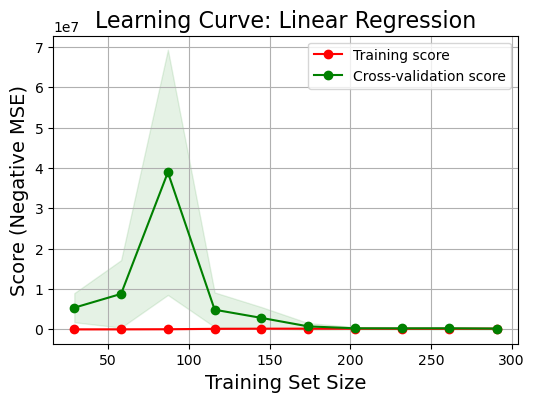

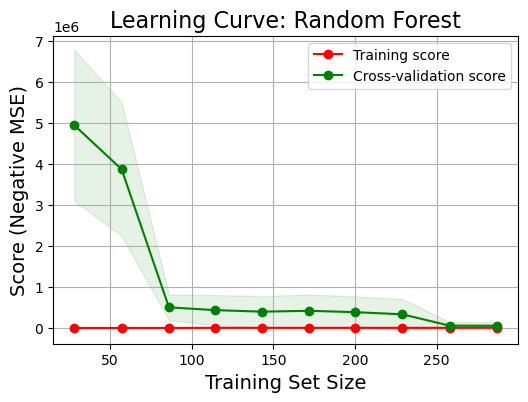

In [104]:
from sklearn.model_selection import learning_curve, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    
    # Generate learning curve data
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)
    
    # Compute mean and std for training and validation scores
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    validation_scores_mean = -validation_scores.mean(axis=1)
    validation_scores_std = validation_scores.std(axis=1)

    # Plotting the learning curve
    plt.grid()
    
    # Plot the training scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    
    # Plot the cross-validation scores
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.xlabel("Training Set Size", fontsize=14)
    plt.ylabel("Score (Negative MSE)", fontsize=14)
    plt.legend(loc="best")
    plt.title(title, fontsize=16)
    plt.show()

# Best K values from cross-validation
best_k_lr = 95  # Replace with the actual best K for Linear Regression
best_k_rf = 40  # Replace with the actual best K for Random Forest

# Use KFold cross-validation for Linear Regression
cv_lr = KFold(n_splits=best_k_lr, shuffle=True, random_state=42)
# Plot learning curve for Linear Regression
plot_learning_curve(LinearRegression(), "Learning Curve: Linear Regression", X, y, cv=cv_lr)

# Use KFold cross-validation for Random Forest
cv_rf = KFold(n_splits=best_k_rf, shuffle=True, random_state=42)
# Plot learning curve for Random Forest
plot_learning_curve(RandomForestRegressor(n_estimators=90, random_state=42), "Learning Curve: Random Forest", X, y, cv=cv_rf)


Best K for Logistic Regression: 100 with Accuracy: 0.6066666666666667
Best K for Random Forest: 50 with Accuracy: 0.6186666666666667


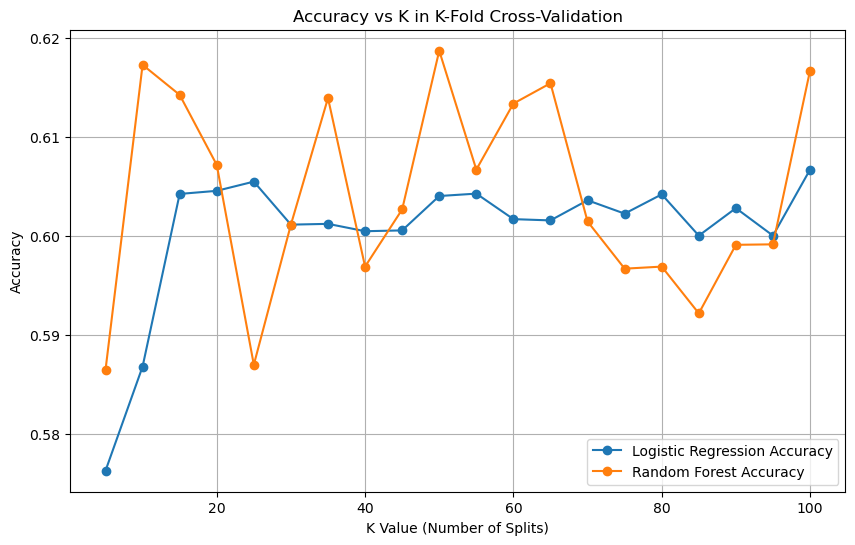

In [98]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Features and target
features = ['US_GDP', 'US_UNRATE', 'US_HousingPriceIndex', 'US_CPI', 'US_INDPRO', 'USREC']
X_class = stock_df[features]
y_class = stock_df['Target']

# Scaling
scaler = StandardScaler()
X_class = scaler.fit_transform(X_class)

# Logistic Regression and Random Forest models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# K values for K-Fold Cross-Validation
k_values = list(range(5, 105, 5))

# Cross-validation strategy
def cross_validation_performance(model, X, y, k_values):
    performance_scores = []
    for k in k_values:
        kfold = KFold(n_splits=k, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        performance_scores.append(scores.mean())
    return performance_scores

# Perform cross-validation for Logistic Regression and Random Forest
log_reg_scores = cross_validation_performance(log_reg, X_class, y_class, k_values)
rf_clf_scores = cross_validation_performance(rf_clf, X_class, y_class, k_values)

# Find best K for both models
best_k_log_reg = k_values[np.argmax(log_reg_scores)]
best_k_rf_clf = k_values[np.argmax(rf_clf_scores)]

print(f"Best K for Logistic Regression: {best_k_log_reg} with Accuracy: {max(log_reg_scores)}")
print(f"Best K for Random Forest: {best_k_rf_clf} with Accuracy: {max(rf_clf_scores)}")

# Plot accuracy scores for both models over varying K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, log_reg_scores, label='Logistic Regression Accuracy', marker='o')
plt.plot(k_values, rf_clf_scores, label='Random Forest Accuracy', marker='o')
plt.xlabel('K Value (Number of Splits)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K in K-Fold Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


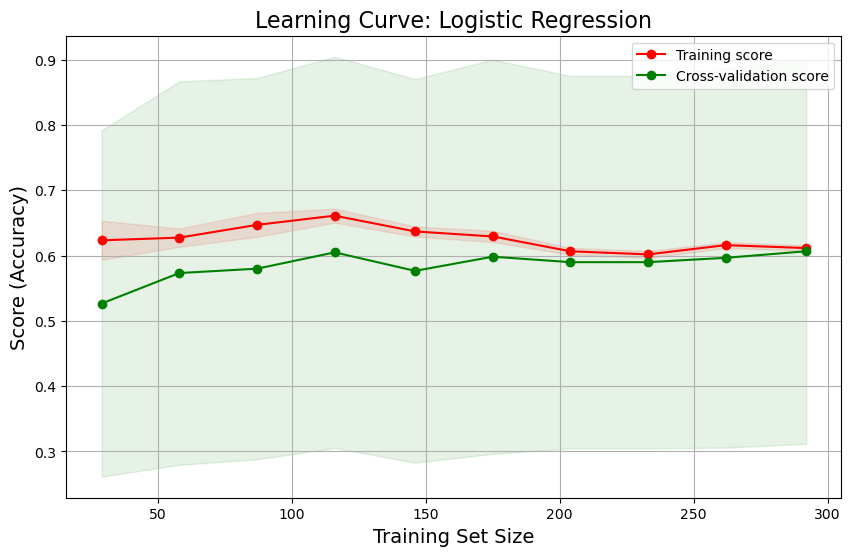

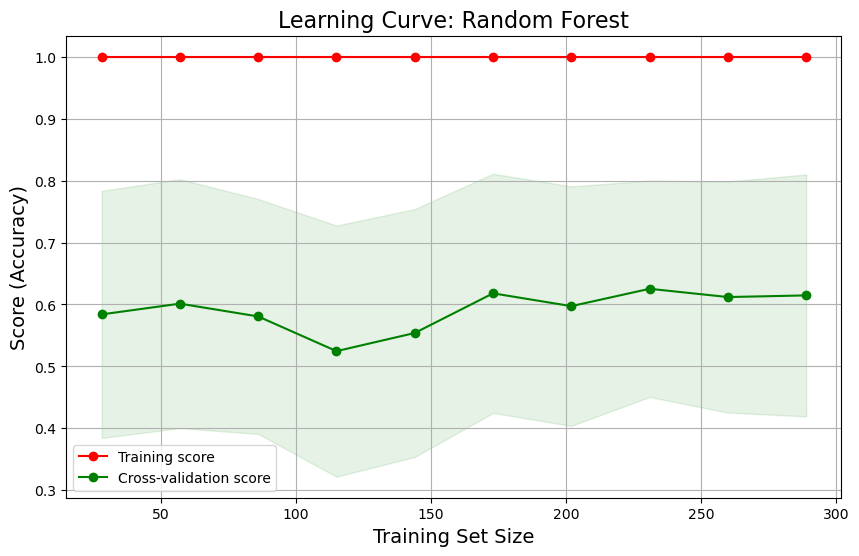

In [106]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    
    # Generate learning curve data
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)

    # Compute mean and std for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plotting the learning curve
    plt.grid()
    
    # Plot the training scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    
    # Plot the cross-validation scores
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.xlabel("Training Set Size", fontsize=14)
    plt.ylabel("Score (Accuracy)", fontsize=14)
    plt.legend(loc="best")
    plt.title(title, fontsize=16)
    plt.show()

# Use KFold cross-validation
best_k_log_reg = 100  # You can replace with the best K value found in cross-validation
best_k_rf_clf = 50   # Similarly, replace this with best K for Random Forest
cv_log_reg = KFold(n_splits=best_k_log_reg, shuffle=True, random_state=42)
cv_rf_clf = KFold(n_splits=best_k_rf_clf, shuffle=True, random_state=42)

# Plot learning curve for Logistic Regression
plot_learning_curve(log_reg, "Learning Curve: Logistic Regression", X_class, y_class, cv=cv_log_reg)

# Plot learning curve for Random Forest
plot_learning_curve(rf_clf, "Learning Curve: Random Forest", X_class, y_class, cv=cv_rf_clf)